# Linear Regression with One Variable

In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

I'm gonna be implementing two Linear Regression models, where the first one is straight math out of the formulas and the second method is more efficient and clean, using numpy library and operating with vectors

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import smpl_linear
%matplotlib inline

In [2]:
path = "data/exdata1.txt"
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [3]:
dir(smpl_linear)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'computeCost',
 'cost_function',
 'gradientDescent',
 'np',
 'predict_profit',
 'train',
 'update_weights']

In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<AxesSubplot:xlabel='Population', ylabel='Profit'>

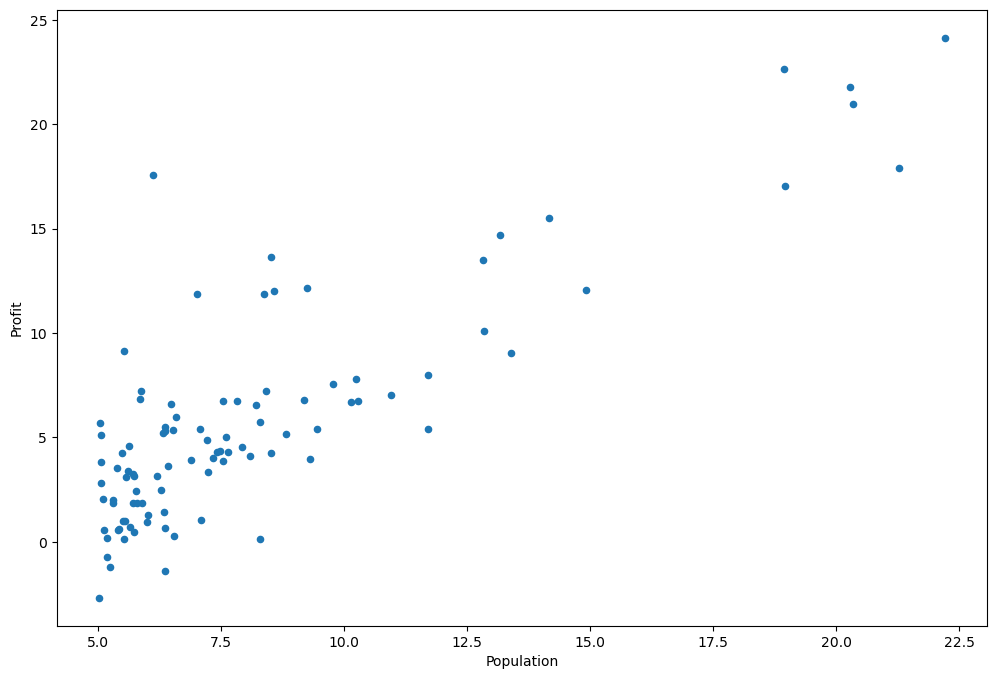

In [5]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

## Making predictions

In [6]:
population = data['Population']
profit = data['Profit']

In [7]:
display(population)

0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
       ...   
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: Population, Length: 97, dtype: float64

In [8]:
starting_weight = 0
starting_bias = 0
learning_rate = 0.01
iters = 1000

In [9]:
weight, bias, cost = smpl_linear.train(population, profit, starting_weight, starting_bias, learning_rate, iters)

iter=0    weight=1.31    bias=0.1168    cost=3.4e+01
iter=10    weight=0.82    bias=-0.0745    cost=1.2e+01
iter=20    weight=0.82    bias=-0.2106    cost=1.1e+01
iter=30    weight=0.84    bias=-0.3414    cost=1.1e+01
iter=40    weight=0.85    bias=-0.4675    cost=1.1e+01
iter=50    weight=0.86    bias=-0.5891    cost=1.1e+01
iter=60    weight=0.87    bias=-0.7064    cost=1.1e+01
iter=70    weight=0.88    bias=-0.8195    cost=1.1e+01
iter=80    weight=0.89    bias=-0.9286    cost=1.1e+01
iter=90    weight=0.91    bias=-1.0339    cost=1e+01
iter=100    weight=0.92    bias=-1.1354    cost=1e+01
iter=110    weight=0.93    bias=-1.2333    cost=1e+01
iter=120    weight=0.94    bias=-1.3278    cost=1e+01
iter=130    weight=0.94    bias=-1.4189    cost=1e+01
iter=140    weight=0.95    bias=-1.5067    cost=1e+01
iter=150    weight=0.96    bias=-1.5915    cost=9.9
iter=160    weight=0.97    bias=-1.6732    cost=9.9
iter=170    weight=0.98    bias=-1.7520    cost=9.8
iter=180    weight=0.99    b

In [10]:
print(cost)

[33.53928474333497, 20.815159503537952, 15.518366960604697, 13.306575069293515, 12.376211646075983, 11.978169038728414, 11.801307545851571, 11.716395840326456, 11.669757570402812, 11.63909786844649, 11.615156054554557, 11.594085154771328, 11.574286762109516, 11.555096407741404, 11.536237534751153, 11.517594708120662, 11.49911941830569, 11.480790957069809, 11.462600167377456, 11.444542693942983, 11.42661617984241, 11.408819102107843, 11.39115028806755, 11.373608714431434, 11.3561934238139, 11.338903490034207, 11.321738003676488, 11.304696066064787, 11.28777678673345, 11.270979282349435, 11.254302676237955, 11.237746098158809, 11.221308684187079, 11.204989576637422, 11.188787924006498, 11.172702880923314, 11.156733608102842, 11.140879272301376, 11.12513904627266, 11.109512108724548, 11.093997644276088, 11.078594843414962, 11.063302902455254, 11.048121023495463, 11.033048414376907, 11.018084288642374, 11.003227865495083, 10.98847836975795, 10.973835031833168, 10.959297087661968, 10.944863

## Visualize the results

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

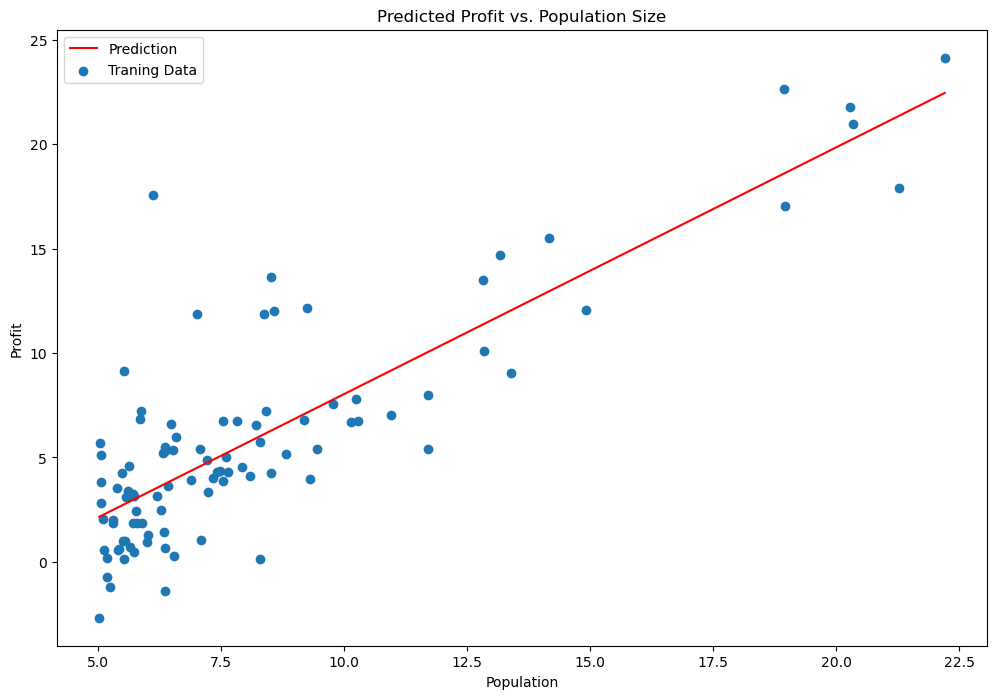

In [11]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = bias + (weight * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

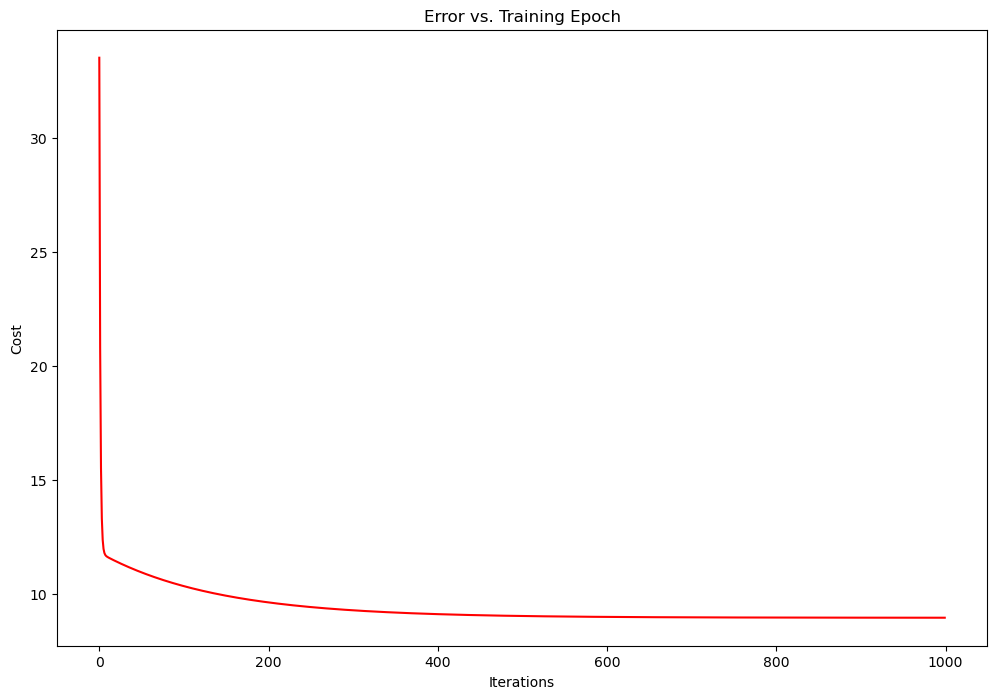

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## Train the model using numpy library

In [13]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [14]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [15]:
X.shape, theta.shape, y.shape


((97, 2), (1, 2), (97, 1))

In [16]:
smpl_linear.computeCost(X, y, theta)

32.072733877455676

In [17]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = smpl_linear.gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [18]:
smpl_linear.computeCost(X, y, g)

4.515955503078914

## Visualize the results

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

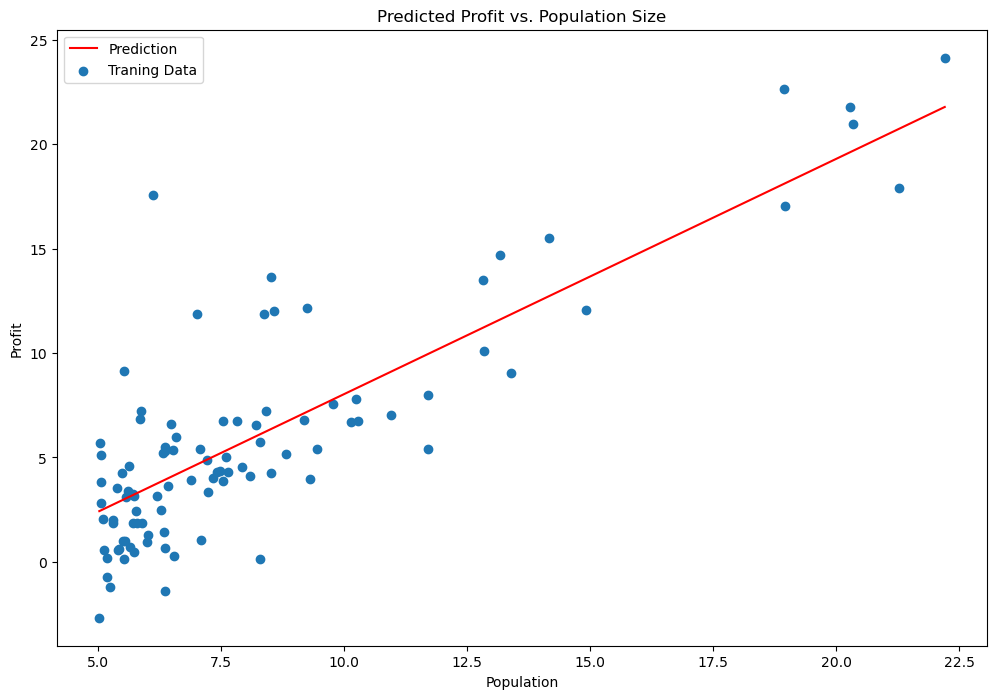

In [19]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

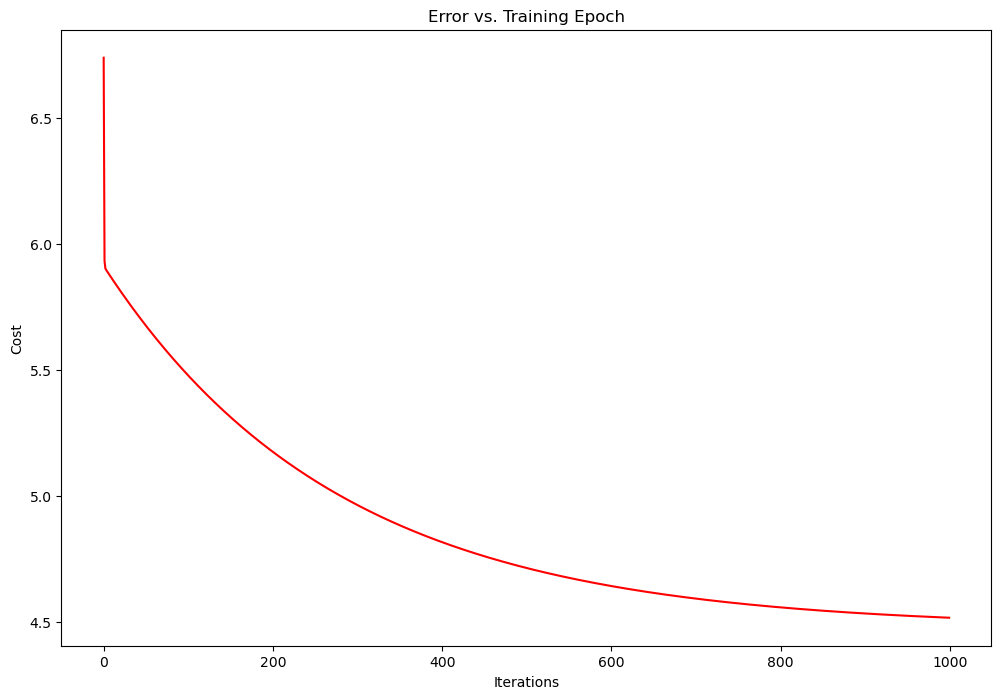

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [21]:
np.arange(iters).shape, cost.shape

((1000,), (1000,))